# **Multi-inference implicit chain of reasoning demonstration**

Here I attempt to solve this challenge [here](https://yuntiandeng.com/cv/challenge.png) by referencing the research paper and source code linked below.

| ||
|----------|----------|
| Research Credit | [here](https://arxiv.org/pdf/2311.01460.pdf) |
| Code Inspiration Credit | [github](https://github.com/da03/implicit_chain_of_thought/tree/main) |

In [1]:
import sys
import os

#For safe imports
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
sys.path.insert(False, parent_directory)


In [2]:
parent_directory = os.path.dirname(notebook_directory)

### **Dataset Generation**
Here we generate our test and train data. We generate our training data randomly such that it represents less than **1%** of possible observations. We also generate our tokenized data here as well.

---

The format of training and test datasets follow this format:

```
[input 1a] $$$ [input 1b]||[CoT 1a] $$$ [CoT 1b] #### [output 1a] $$$ [output 1b]
[input 2a] $$$ [input 2b]||[CoT 2a] $$$ [CoT 2b] #### [output 2a] $$$ [output 2b]
[input 3a] $$$ [input 3b]||[CoT 3a] $$$ [CoT 3b] #### [output 3a] $$$ [output 3b]
```

In [3]:
from data.data import DatasetHandler
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

training_data_size = 777
test_data_size = 77

datahandler_train = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'train')
datahandler_test = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'test')

datahandler_train.generateDataset(size = training_data_size)
datahandler_test.generateDataset(size = test_data_size)

Generated raw train dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_train_dataset.txt of size 77700.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_train_dataset.txt
tgt_avg:  21.0
src_avg:  13.0
ratios:  0.6190476190476191
tgt_avg:  15.0
src_avg:  13.0
ratios:  0.8666666666666667
---------------------------
Example features:
Full entry:  3 1 * 2 4 $$$ 3 0 * 6 9 <|endoftext|> 6 2 0 + 0 2 5 0 $$$ 8 1 0 + 0 7 2 0 <|endoftext|> #### 6 4 5 0 $$$ 8 8 2 0 <|endoftext|>
No CoT:  3 1 * 2 4 $$$ 3 0 * 6 9 <|endoftext|> #### 6 4 5 0 $$$ 8 8 2 0 <|endoftext|>
Only CoT:  3 1 * 2 4 $$$ 3 0 * 6 9 <|endoftext|> 6 2 0 + 0 2 5 0 $$$ 8 1 0 + 0 7 2 0 <|endoftext|>
Product input:  3 1 * 2 4 $$$ 3 0 * 6 9 <|endoftext|> 
---------------------------
Generated raw test dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_test_dataset.txt of size 7700.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_test_data

### **Model Training**
Here we begin training our individual models.

---


In [4]:
from source.teacher import Teacher
from source.configurations import TeacherConfig

teacher_config = TeacherConfig()
teacher_model = Teacher(teacher_config)

  0%|          | 1/2429 [00:01<1:01:34,  1.52s/it]

Step: 0. PPL: 87.105179. Training Accuracy: 0.201287


 10%|█         | 251/2429 [01:15<10:34,  3.43it/s]

Step: 250. PPL: 1.741662. Training Accuracy: 0.784007


 21%|██        | 501/2429 [02:30<10:07,  3.17it/s]

Step: 500. PPL: 1.315225. Training Accuracy: 0.895221


 31%|███       | 751/2429 [03:45<08:34,  3.26it/s]

Step: 750. PPL: 1.152968. Training Accuracy: 0.947610


 41%|████      | 1001/2429 [05:01<06:53,  3.45it/s]

Step: 1000. PPL: 1.078810. Training Accuracy: 0.969669


 50%|████▉     | 1206/2429 [06:01<06:06,  3.34it/s]


Accuracy limit reached, stopping training at training accuracy: 0.993566.


  0%|          | 1/241 [00:00<02:00,  1.99it/s]

Input:  5 7 * 0 6 $$$ 3 4 * 6 7 
Target:  0 0 0 + 0 0 5 4 $$$ 8 5 2 + 0 1 0 3  #### 0 0 5 4 $$$ 8 6 2 3 
Predicted:  0 0 0 + 0 0 5 4 $$$ 8 5 2 + 0 1 0 3  #### 0 0 5 4 $$$ 8 6 2 3 



  1%|          | 2/241 [00:00<01:58,  2.02it/s]

Input:  6 0 * 8 0 $$$ 1 9 * 3 3 
Target:  8 4 0 + 0 0 0 0 $$$ 3 7 2 + 0 3 7 2  #### 8 4 0 0 $$$ 3 0 0 3 
Predicted:  8 4 0 + 0 0 0 0 $$$ 3 7 2 + 0 3 7 2  #### 8 4 0 0 $$$ 3 0 0 3 



  1%|          | 3/241 [00:01<01:54,  2.07it/s]

Input:  8 2 * 3 2 $$$ 3 4 * 4 1 
Target:  4 8 0 + 0 6 5 0 $$$ 2 7 1 + 0 3 4 0  #### 4 4 6 0 $$$ 2 0 6 0 
Predicted:  4 8 0 + 0 6 5 0 $$$ 2 7 1 + 0 3 4 0  #### 4 4 6 0 $$$ 2 0 6 0 



  2%|▏         | 4/241 [00:01<01:53,  2.09it/s]

Input:  7 4 * 6 2 $$$ 5 7 * 8 5 
Target:  2 8 2 + 0 4 9 0 $$$ 0 0 6 + 0 5 7 3  #### 2 2 2 1 $$$ 0 5 3 4 
Predicted:  2 9 2 + 0 4 9 0 $$$ 0 0 6 + 0 5 7 3  #### 2 3 2 1 $$$ 0 5 3 4 



100%|██████████| 241/241 [01:56<00:00,  2.06it/s]


Val. PPL: 1.016108; Accuracy: 0.855584; Training Accuracy: 0.995199.
Saving to c:\Users\Luke\multi_implicit_cot\teacher_model


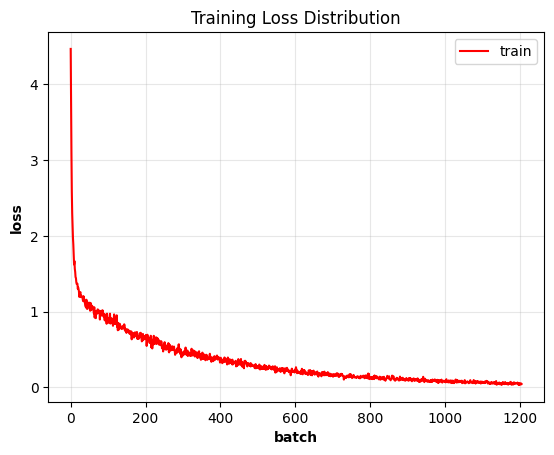

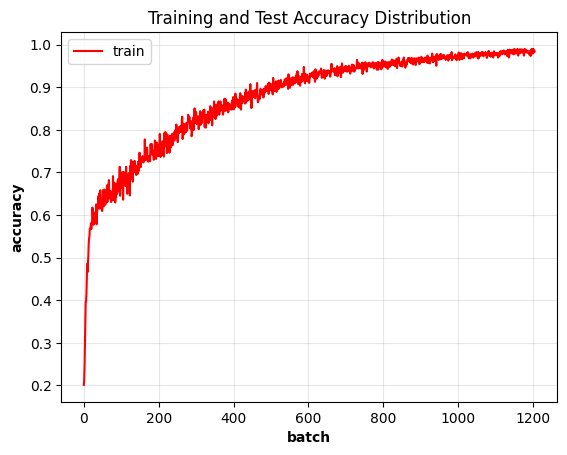

In [5]:
teacher_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

In [6]:
custom_prediction = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'custom')
custom_prediction.generateDataset(a=10, b=5, c=9, d=98)
teacher_model.predict(custom_prediction)

Generated raw custom dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_custom_dataset.txt of size 1.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_custom_dataset.txt
tgt_avg:  21.0
src_avg:  13.0
ratios:  0.6190476190476191
tgt_avg:  15.0
src_avg:  13.0
ratios:  0.8666666666666667
---------------------------
Example features:
Full entry:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0 <|endoftext|> #### 0 5 0 0 $$$ 2 8 8 0 <|endoftext|>
No CoT:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> #### 0 5 0 0 $$$ 2 8 8 0 <|endoftext|>
Only CoT:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0 <|endoftext|>
Product input:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 
---------------------------


100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Input:  0 1 * 5 0 $$$ 9 0 * 8 9 
Target:  0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0  #### 0 5 0 0 $$$ 2 8 8 0 
Predicted:  0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0  #### 0 5 0 0 $$$ 2 8 8 0 

